# esL1: FIR Filter
### Koeffizienten berechnen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

## Filter definieren

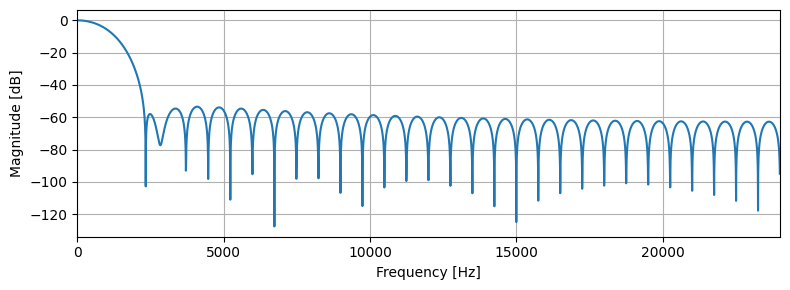

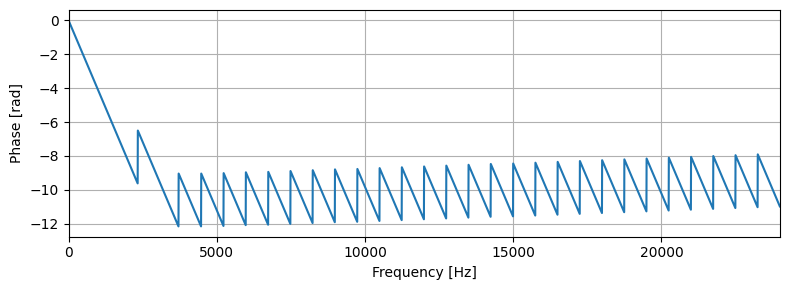

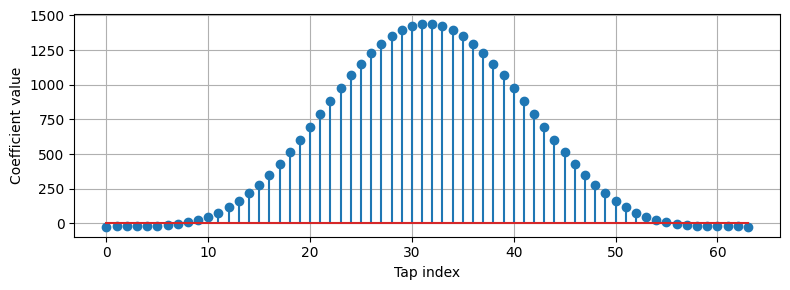


Fixed-point coefficients (Q1.15 int16):
-23, -22, -22, -22, -21, -18, -13, -6, 7, 24, 48, 78, 116, 163, 217, 280, 351, 429, 513, 602, 696, 791, 886, 979, 1069, 1153, 1229, 1295, 1351, 1393, 1422, 1437, 1437, 1422, 1393, 1351, 1295, 1229, 1153, 1069, 979, 886, 791, 696, 602, 513, 429, 351, 280, 217, 163, 116, 78, 48, 24, 7, -6, -13, -18, -21, -22, -22, -22, -23, 

In [10]:
def design_fir(cutoff_hz, fs_hz, num_taps, ftype):
    nyq = fs_hz / 2

    if ftype == "lp":
        coeff = firwin(num_taps, cutoff_hz[0] / nyq, pass_zero=True)

    elif ftype == "hp":
        coeff = firwin(num_taps, cutoff_hz[0] / nyq, pass_zero=False)

    elif ftype == "bp":
        coeff = firwin(num_taps,
                       [cutoff_hz[0] / nyq, cutoff_hz[1] / nyq],
                       pass_zero=False)

    elif ftype == "bs":
        coeff = firwin(num_taps,
                       [cutoff_hz[0] / nyq, cutoff_hz[1] / nyq],
                       pass_zero=True)

    else:
        raise ValueError("ftype must be lp, hp, bp, or bs")

        # Frequency response
    w, h = freqz(coeff, worN=4096)
    f = w * fs_hz / (2*np.pi)

    # Magnitude
    plt.figure(figsize=(8,3))
    plt.plot(f, 20*np.log10(np.abs(h)))
    plt.ylabel("Magnitude [dB]")
    plt.xlabel("Frequency [Hz]")
    plt.grid(True)
    plt.xlim(0, fs_hz/2)
    plt.tight_layout()
    plt.show()

    # Phase
    plt.figure(figsize=(8,3))
    plt.plot(f, np.unwrap(np.angle(h)))
    plt.ylabel("Phase [rad]")
    plt.xlabel("Frequency [Hz]")
    plt.grid(True)
    plt.xlim(0, fs_hz/2)
    plt.tight_layout()
    plt.show()

    # Fixed-point scaling Q1.15
    scale = 2**15
    fixed = np.round(coeff * scale)
    fixed = np.clip(fixed, -32768, 32767).astype(np.int16)

    # Plot coefficients
    plt.figure(figsize=(8,3))
    plt.stem(fixed)
    plt.ylabel("Coefficient value")
    plt.xlabel("Tap index")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nFixed-point coefficients (Q1.15 int16):")
    for x in fixed:
        print(f"{int(x)}, ", end="")

    return coeff, fixed


# Example run
_ = design_fir([1000], 48000, 64, "lp")